In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Unnamed: 0,Pays,Disponibilité de protéines en quantité (g/personne/jour),Importations - Quantité,Population,PIB,Taux-Croissance-Population,Taux_CPib,Political_Stability
0,0,Arménie,5.44,35.0,2944.791,12115.1,23.039342,12.536812,-0.62
1,1,Afghanistan,0.54,29.0,36296.113,2058.4,4.302244,14.486014,-2.80
2,2,Albanie,6.26,38.0,2884.169,12771.0,4.614920,12.690203,0.38
3,3,Algérie,1.97,2.0,41389.189,11737.4,5.244265,18.952196,-0.92
4,4,Angola,3.60,277.0,29816.766,7310.9,19.246101,13.323765,-0.38


In [4]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
data.drop(['Disponibilité de protéines en quantité (g/personne/jour)','Population'],axis=1,inplace=True)

In [6]:
data

,Pays,Importations - Quantité,PIB,Taux-Croissance-Population,Taux_CPib,Political_Stability
0,Arménie,35.0,12115.1,23.039342,12.536812,-0.62
1,Afghanistan,29.0,2058.4,4.302244,14.486014,-2.80
2,Albanie,38.0,12771.0,4.614920,12.690203,0.38
3,Algérie,2.0,11737.4,5.244265,18.952196,-0.92
4,Angola,277.0,7310.9,19.246101,13.323765,-0.38
...,...,...,...,...,...,...
167,Belgique,338.0,50442.3,5.671993,12.125676,0.43
168,Luxembourg,11.0,114986.0,3.425398,7.441916,1.33
169,Serbie,12.0,16611.0,1.789254,10.631044,0.09
170,Monténégro,8.0,19682.3,11.584489,9.762212,-0.06


In [7]:
data.columns
#specify the 8 metrics column names to be modelled
to_model_columns=data.columns[1:6]
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(data[to_model_columns])
pred = clf.predict(data[to_model_columns])
data['anomaly']=pred
outliers=data.loc[data['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(data['anomaly'].value_counts())

 1    151
-1     21
Name: anomaly, dtype: int64


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [8]:
X_train_cleaned = data[np.where(data.anomaly == 1, True, False)]

# PCA

In [9]:
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

In [10]:
# Choix des colonnes à prendre en compte
x = to_model_columns.values
names = data.index # ou data.index pour avoir les intitulés


In [11]:
pca = decomposition.PCA().fit(data[to_model_columns])
print('Explained_variance_ ',pca.explained_variance_)
print('Component ',pca.components_)

Explained_variance_  [4.31011072e+08 3.13100718e+04 2.64736948e+03 2.00362314e+01
 5.27578708e-01]
Component  [[ 2.73378164e-03  9.99996236e-01 -2.15518506e-04 -8.77046259e-05
   2.34424103e-05]
 [ 9.99992270e-01 -2.73439430e-03 -2.26478626e-03 -1.64558768e-03
  -3.80547977e-04]
 [ 2.26065124e-03  2.09158183e-04  9.99993003e-01 -2.48329996e-03
  -1.63470640e-03]
 [ 1.63775234e-03  8.44805868e-05  2.42386558e-03  9.99442906e-01
  -3.32462427e-02]
 [-4.38868791e-04  2.13441453e-05 -1.71537327e-03 -3.32414609e-02
  -9.99445781e-01]]


## Estimation how many components are needed to describe the data by looking at the cumulative explained variance ratio as a function of the number of components:

    

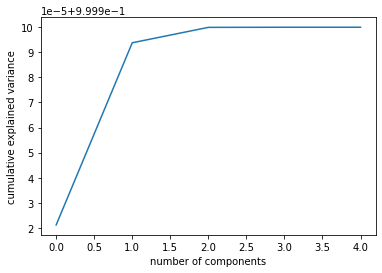

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

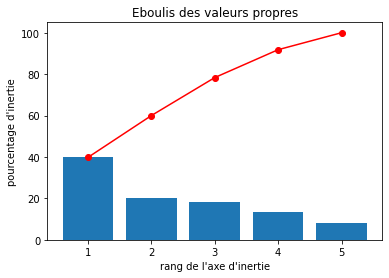

In [13]:
# Centrage et Réduction
n_comp = 5
# # Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(data[to_model_columns])
X_scaled = std_scale.transform(data[to_model_columns])

# # Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# # Eboulis des valeurs propres
display_scree_plot(pca)



In [14]:
# Transformation des individus
X_projected = pca.transform(X_scaled)

In [15]:
features = data[to_model_columns].columns
# Theme du ou des parcours auxquels appartient le cours (data, developpement, marketing, etc.)

# Cercle des corrélations
# pcs = pca.components_
# display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Cercle des corrélations
pcs = pca.components_
# display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)],labels = np.array(features))
# display_circles(pcs, n_comp, pca, [(0,1)], lims=[.0155, .019, 0.053, .057], labels = np.array(features))
# display_circles(pcs, n_comp, pca, [(2,3)], lims=[-.035, -.026, -.03,-.016], labels = np.array(features))



<Figure size 1224x1224 with 0 Axes>

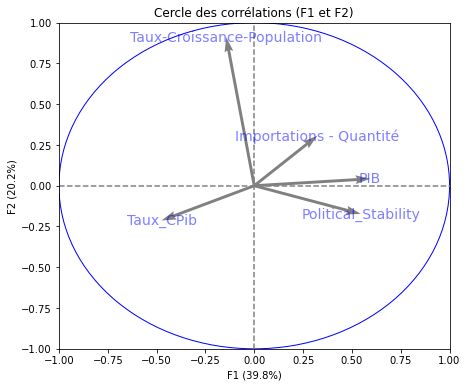

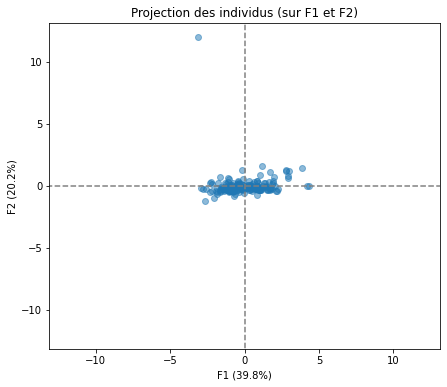

<Figure size 1224x1224 with 0 Axes>

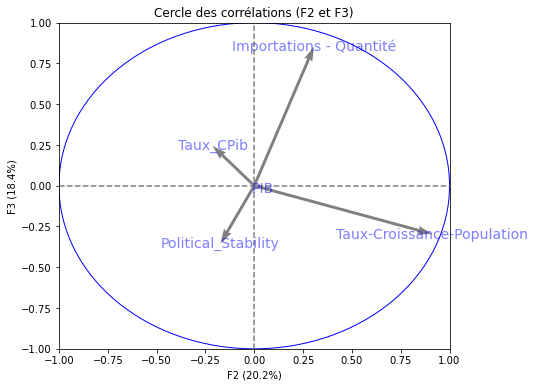

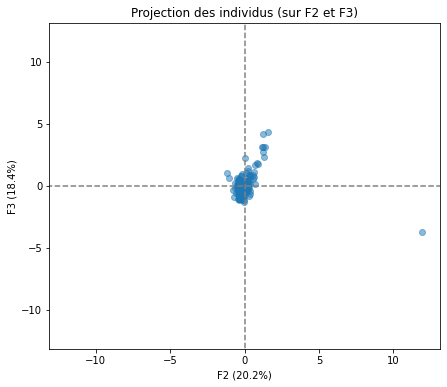

<Figure size 1224x1224 with 0 Axes>

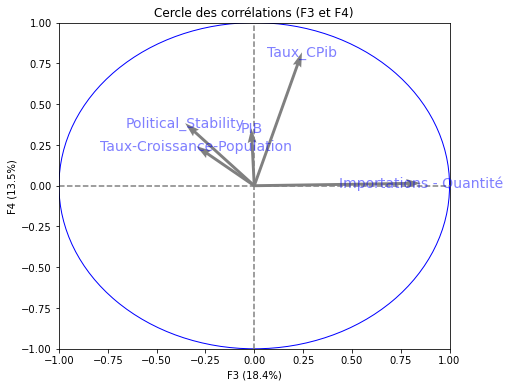

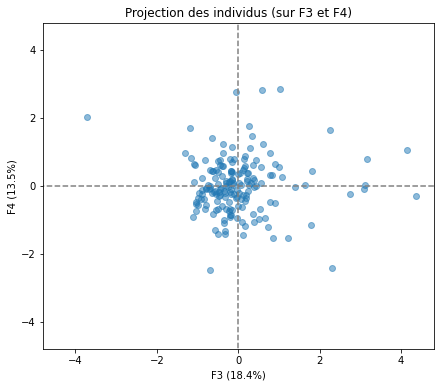

In [16]:
plt.figure(figsize=(17,17))
# plt.subplot(2,2,1)
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))
# plt.subplot(2,2,2)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], alpha = 0.5)
plt.show()

print("="*100,"\n")
plt.figure(figsize=(17,17))
# plt.subplot(2,2,3)
display_circles(pcs, n_comp, pca, [(1,2)], labels = np.array(features))
# plt.subplot(2,2,4)
display_factorial_planes(X_projected, n_comp, pca, [(1,2)], alpha = 0.5)
plt.show()

print("="*100,"\n")
plt.figure(figsize=(17,17))
# plt.subplot(2,2,3)
display_circles(pcs, n_comp, pca, [(2,3)], labels = np.array(features))
# plt.subplot(2,2,4)
display_factorial_planes(X_projected, n_comp, pca, [(2,3)], alpha = 0.5)
plt.show()


In [17]:
print("original shape:   ", data.shape)
print("transformed shape:", X_projected.shape)

original shape:    (172, 7)
transformed shape: (172, 5)


In [18]:
print(data.index)

RangeIndex(start=0, stop=172, step=1)


In [19]:
# Récuperation des components
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]
pc4 = pca.components_[3]
pc5 = pca.components_[4]

In [20]:
print(X_projected.shape)

(172, 5)


In [21]:
axis = pd.DataFrame(X_projected, index=data.index, columns=['PC1','PC2','PC3','PC4','PC5'])

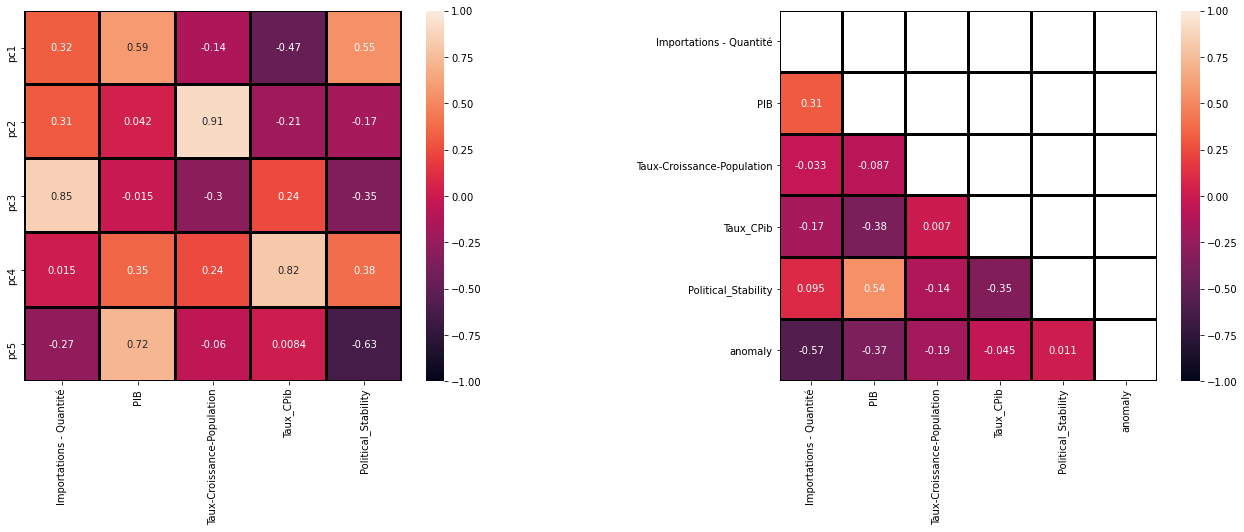

In [22]:
pcss = pd.DataFrame(pcs, columns=['Importations - Quantité', 'PIB','Taux-Croissance-Population','Taux_CPib','Political_Stability'])
pcss.index = ["pc1","pc2","pc3","pc4","pc5"]

plt.figure(figsize=(22,15))
plt.subplot(2,2,1)
sns.heatmap(pcss, annot=True,linecolor='k', linewidths=2,vmin=-1, vmax=1,)
plt.subplot(2,2,2)
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True,linecolor='k', linewidths=2)
plt.subplots_adjust(wspace=0.6)
plt.show()

In [119]:
data

,Pays,Disponibilité de protéines en quantité (g/personne/jour),Importations - Quantité,Population,PIB,Taux-Croissance-Population,Taux_CPib,Political_Stability,anomaly
0,Arménie,5.44,35.0,2944.791,12115.1,23.039342,12.536812,-0.62,1
1,Afghanistan,0.54,29.0,36296.113,2058.4,4.302244,14.486014,-2.80,1
2,Albanie,6.26,38.0,2884.169,12771.0,4.614920,12.690203,0.38,1
3,Algérie,1.97,2.0,41389.189,11737.4,5.244265,18.952196,-0.92,1
4,Angola,3.60,277.0,29816.766,7310.9,19.246101,13.323765,-0.38,1
...,...,...,...,...,...,...,...,...,...
167,Belgique,4.57,338.0,11419.748,50442.3,5.671993,12.125676,0.43,1
168,Luxembourg,7.19,11.0,591.910,114986.0,3.425398,7.441916,1.33,-1
169,Serbie,3.50,12.0,8829.628,16611.0,1.789254,10.631044,0.09,1
170,Monténégro,5.79,8.0,627.563,19682.3,11.584489,9.762212,-0.06,1


In [ ]:
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités
n_clust = 6
# préparation des données pour le clustering
X = data.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
# X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

In [25]:
pip install yellowbrick


     |████████████████████████████████| 274 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 269 kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn: filename=scikit_learn-1.1.1-cp38-cp38-macosx_10_12_x86_64.whl size=8057207 sha256=16e29afbf3ee3a90abf7863d5203919a9144dd04276ed1e23f256fe05edb1822
  Stored in directory: /Users/djibrilkaba/Library/Caches/pip/wheels/ec/23/fd/6bfce47bb69f2eaeceee54cc143e60523b8adf0e306f9cbc2f
Successfully built scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
Note: you may need to restart the kernel to use updated packages.


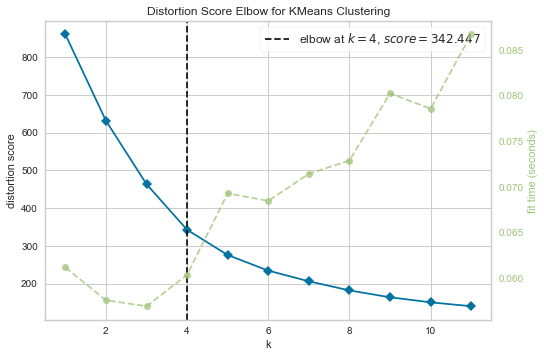

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(X_projected)
visualizer.show()

In [28]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(X_projected)

In [30]:
kmeans.labels_

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       3, 0, 1, 0, 0, 1, 3, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 3, 0, 0, 0, 1,
       1, 1, 3, 0, 0, 0, 1, 0, 0, 3, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 3, 0, 1, 1, 1, 0, 1, 3, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       3, 1, 1, 0, 0, 3, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 3,
       1, 3, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int32)

In [31]:
kmeans.inertia_

342.4474597702001

In [32]:
kmeans.n_iter_

10

In [33]:
kmeans.cluster_centers_

array([[ 0.96942372, -0.13072222, -0.51139546, -0.05239244, -0.01425246],
       [-1.1244257 , -0.16808317,  0.15950333,  0.04260969,  0.04894355],
       [-3.11442215, 11.93579957, -3.70373441,  2.02782462, -0.50488881],
       [ 2.1718162 ,  1.10164324,  2.65195548, -0.14774666, -0.2293802 ]])

In [ ]:
from collections import Counter
Counter(kmeans.labels_)